In [1]:
import pandas as pd
import datetime
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [3]:
targetdir = "./data/TraderTraderStrength/total_window_cdf/"
filename = "trader_strengthCDF_total_window.csv"

df = pd.read_csv(targetdir + filename)

In [4]:
df

,timestamp,totalDegree,strength_cumulative_probability,total_connections
0,1619560797000,15528,0.000002,5977258
1,1619560797000,8599,0.000004,5977258
2,1619560797000,8484,0.000006,5977258
3,1619560797000,8004,0.000008,5977258
4,1619560797000,6919,0.000009,5977258
...,...,...,...,...
532723,1619560797000,1,1.000000,5977258
532724,1619560797000,1,1.000000,5977258
532725,1619560797000,1,1.000000,5977258
532726,1619560797000,1,1.000000,5977258


In [5]:
df.drop(["total_connections"], axis=1, inplace=True)

In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms').dt.normalize()

In [7]:
df

,timestamp,totalDegree,strength_cumulative_probability
0,2021-04-27,15528,0.000002
1,2021-04-27,8599,0.000004
2,2021-04-27,8484,0.000006
3,2021-04-27,8004,0.000008
4,2021-04-27,6919,0.000009
...,...,...,...
532723,2021-04-27,1,1.000000
532724,2021-04-27,1,1.000000
532725,2021-04-27,1,1.000000
532726,2021-04-27,1,1.000000


# Strength CDF

In [8]:
strength_df = df[["totalDegree", "strength_cumulative_probability"]].sort_values(["totalDegree"], ascending=False)
strength_df

,totalDegree,strength_cumulative_probability
0,15528,0.000002
1,8599,0.000004
2,8484,0.000006
3,8004,0.000008
4,6919,0.000009
...,...,...
422266,1,1.000000
422267,1,1.000000
422268,1,1.000000
422269,1,1.000000


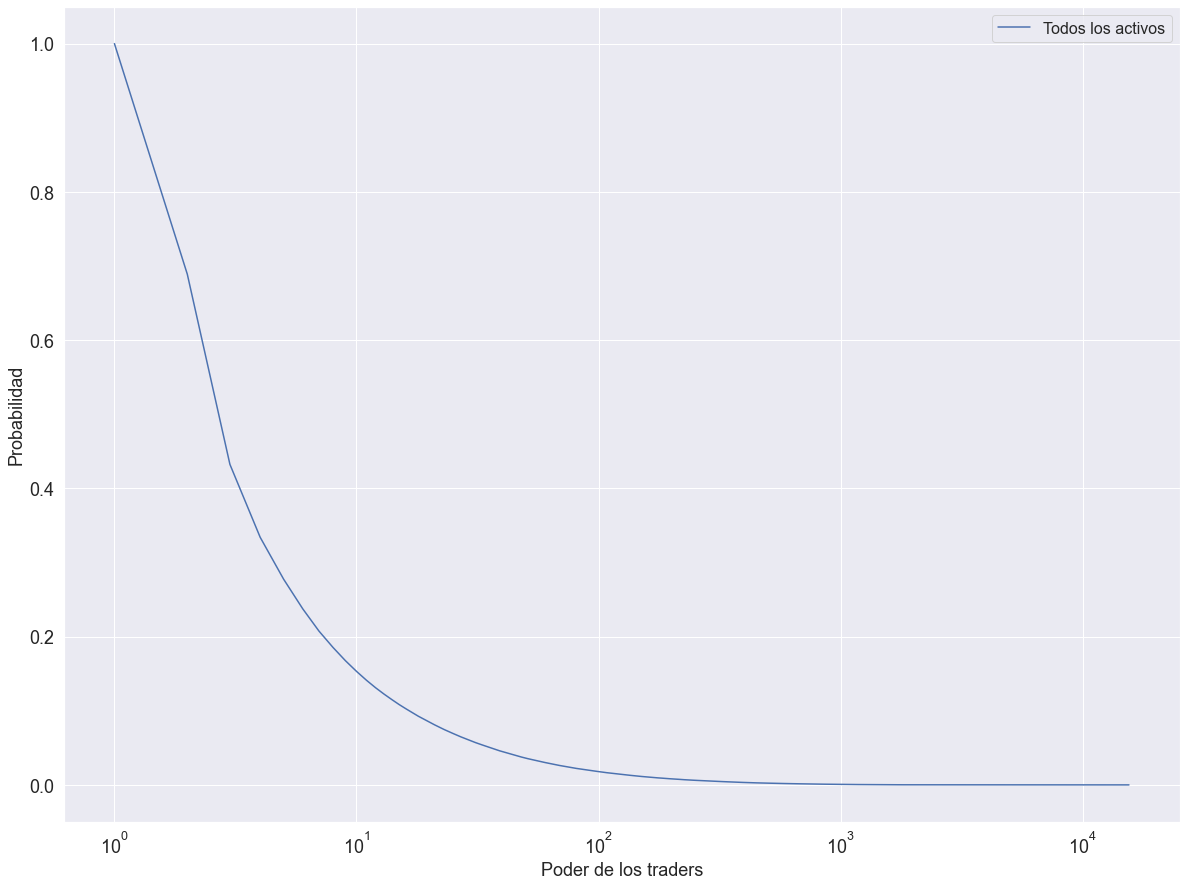

In [11]:
ax = strength_df.plot(kind = 'line', x = 'totalDegree', y = 'strength_cumulative_probability')

ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("Poder de los traders", fontsize=18)
ax.set_ylabel("Probabilidad", fontsize=18)
plt.legend(["Todos los activos"], prop={'size': 16})
plt.rcParams["figure.figsize"] = (20,15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

plt.savefig("./traderStrengthCDF/total_window/Figura_27.svg", bbox_inches='tight')

In [52]:
strength_df[(strength_df["strength_cumulative_probability"] > 0.24) & 
            (strength_df["strength_cumulative_probability"] < 0.9)]

,totalDegree,strength_cumulative_probability
140710,5,0.277479
140705,5,0.277479
140711,5,0.277479
140709,5,0.277479
140708,5,0.277479
...,...,...
275900,2,0.688973
275904,2,0.688973
275899,2,0.688973
275898,2,0.688973


In [65]:
strength_df[(strength_df["strength_cumulative_probability"] > 0.049742) & 
            (strength_df["strength_cumulative_probability"] < 0.0599999)][-100:]

,totalDegree,strength_cumulative_probability
30705,30,0.058901
30707,30,0.058901
30708,30,0.058901
30709,30,0.058901
30710,30,0.058901
...,...,...
30739,30,0.058901
30743,30,0.058901
30740,30,0.058901
30741,30,0.058901


In [69]:
strength_df[strength_df["strength_cumulative_probability"] < 0.010][-100:]

,totalDegree,strength_cumulative_probability
5180,171,0.009784
5181,171,0.009784
5182,171,0.009784
5184,171,0.009784
5185,171,0.009784
...,...,...
5270,169,0.009947
5271,169,0.009947
5273,169,0.009947
5274,169,0.009947


In [16]:
strength_df[(strength_df["strength_cumulative_probability"] > 0.749999) & 
            (strength_df["strength_cumulative_probability"] < 0.750999)]

,totalDegree,strength_cumulative_probability


In [48]:
strength_df[230330:230340]

,totalDegree,strength_cumulative_probability
195411,3,0.432367
195412,3,0.432367
195414,3,0.432367
195413,3,0.432367
321470,2,0.688973
321468,2,0.688973
321466,2,0.688973
321469,2,0.688973
321477,2,0.688973
321471,2,0.688973


In [47]:
strength_df["totalDegree"].median()

2.0

In [18]:
532728/2


266364.0

In [51]:
1 -0.432367

0.567633

In [50]:
strength_df

,totalDegree,strength_cumulative_probability
0,15528,0.000002
1,8599,0.000004
2,8484,0.000006
3,8004,0.000008
4,6919,0.000009
...,...,...
422266,1,1.000000
422267,1,1.000000
422268,1,1.000000
422269,1,1.000000


In [11]:
df["totalDegree"].mean()

11.22009355618627

In [12]:
df["totalDegree"].max()

15528

In [13]:
df["totalDegree"].median()

2.0